In [3]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def demand(x1,x2):
    return 120-(x1+x2)

def cost(x):
    return 30*x

In [5]:
def profit(x1,x2):
    return demand(x1,x2)*x1-cost(x1)

In [6]:
def reaction(x2):
    x1 = (90-x2)/2
    return x1

In [7]:
def vector_reaction(x):
    return array(x)-array([reaction(x[1]),reaction(x[0])])

In [8]:
x0 = [40, 40]

results = optimize.fsolve(vector_reaction, x0)
print(results)

[30. 30.]


In [9]:
print('The profit is', profit(30,30))

The profit is 900


## Simulation

In [24]:
x_grid = np.linspace(10, 60, 100)
xvalue = []
profits = []

for x in x_grid:
    profit(x,x)
    xvalue.append(x)
    profits.append(profit(x,x))

In [25]:
print(profits)
print(x2value)

[700.0, 724.7423732272217, 748.4644424038363, 771.1662075298439, 792.8476686052444, 813.5088256300378, 833.1496786042239, 851.7702275278033, 869.3704724007755, 885.9504132231406, 901.5100499948985, 916.0493827160494, 929.5684113865933, 942.0671360065301, 953.5455565758596, 964.0036730945823, 973.4414855626978, 981.8589939802063, 989.2561983471076, 995.6330986634016, 1000.9896949290888, 1005.325987144169, 1008.641975308642, 1010.9376594225079, 1012.2130394857667, 1012.4681154984185, 1011.702887460463, 1009.9173553719007, 1007.1115192327311, 1003.2853790429546, 998.438934802571, 992.5721865115802, 985.6851341699825, 977.7777777777776, 968.8501173349655, 958.9021528415466, 947.9338842975205, 935.9453117028874, 922.9364350576471, 908.9072543617997, 893.8577696153453, 877.7879808182838, 860.697887970615, 842.5874910723395, 823.4567901234565, 803.3057851239666, 782.1344760738696, 759.9428629731657, 736.7309458218549, 712.4987246199366, 687.2461993674115, 660.9733700642792, 633.6802367105397,

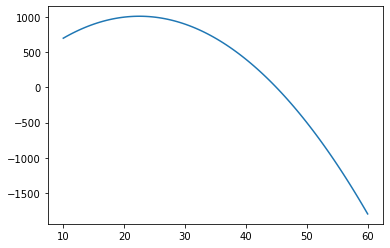

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(xvalue,profits)

In [39]:
optimum_profit = max(profits)
optimum_quantity = xvalue[profits.index(max(profits))]

print('The optimal proft occurs when the two companies collude and produce', "%.2f" % optimum_quantity, 'units and gaining', "%.2f" % optimum_profit, 'as profits')

The optimal proft occurs when the two companies collude and produce 22.63 units and gaining 1012.47 as profits
